In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x = np.random.randint(1, 20, size=20)
y = np.random.randint(1, 20, size = 20)

In [35]:
dataset = np.column_stack((x, y))
dataset[:5]

array([[ 2, 18],
       [ 1,  9],
       [12,  2],
       [12, 15],
       [17,  7]])

In [36]:
np.random.seed(42)
np.random.shuffle(dataset)
dataset[:5]

array([[ 2, 18],
       [18, 10],
       [ 9,  2],
       [ 1,  9],
       [15,  3]])

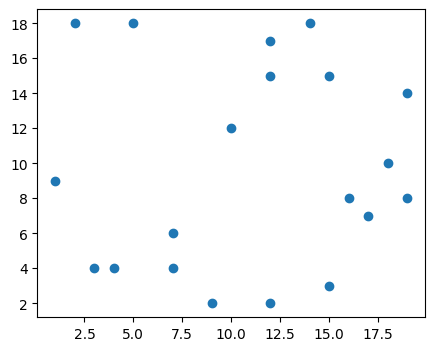

In [37]:
plt.figure(figsize = (5, 4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [38]:
k = 3
centroids = dataset[:k]
centroids

array([[ 2, 18],
       [18, 10],
       [ 9,  2]])

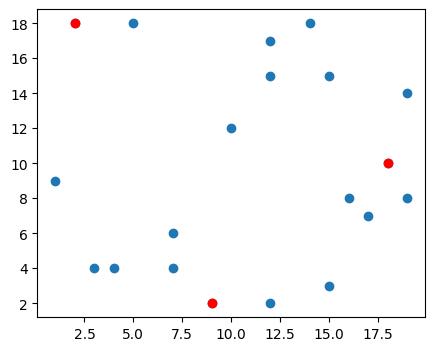

In [39]:
plt.figure(figsize = (5, 4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
plt.show()

In [40]:
def euclidien_distance(point, centroid) :
  return np.sqrt(np.sum((point - centroid) ** 2))

In [41]:
def assign_centroid(dataset, centroids) :
  lists = []
  for point in dataset :
    distances = [ euclidien_distance(point, centroid) for centroid in centroids]
    closest_centroid = np.argmin(distances)
    lists.append(closest_centroid)

  return lists

In [42]:
lists = assign_centroid(dataset, centroids)
centroids

array([[ 2, 18],
       [18, 10],
       [ 9,  2]])

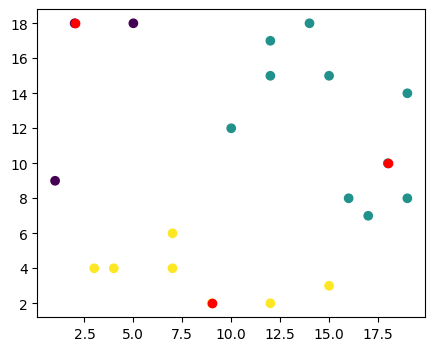

In [43]:
plt.figure(figsize = (5, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], c=lists, cmap = 'viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
plt.show()

In [44]:
def recalculate_centroids_point(dataset, k, labels) :
  new_centroids = np.zeros((k, dataset.shape[1]))
  for i in range(k) :
    points_assigned = dataset[np.array(labels) == i]
    if len(points_assigned) > 0 :
      new_centroids[i] = np.mean(points_assigned, axis = 0)

  return new_centroids

In [46]:
max_iterations = 10
for i in range(max_iterations) :
  labels = assign_centroid(dataset, centroids)
  new_centroids = recalculate_centroids_point(dataset, k, labels)

  if np.all(centroids == new_centroids) :
    print(f"Centroids converged after {i + 1} iterations")
    break

  centroids = new_centroids

Centroids converged after 2 iterations


In [47]:
print(f"Final centroids : {centroids}")

Final centroids : [[ 2.66666667 15.        ]
 [15.2        12.4       ]
 [ 8.14285714  3.57142857]]


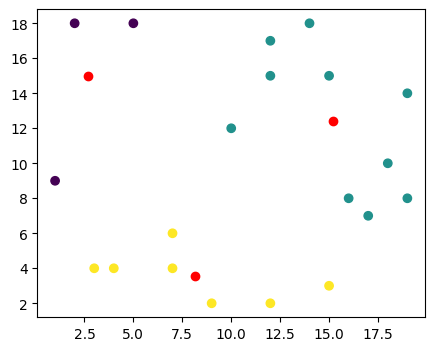

In [48]:
plt.figure(figsize = (5, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], c=lists, cmap = 'viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
plt.show()